In [51]:
from random import gauss
import numpy as np
import matplotlib.pyplot as plt

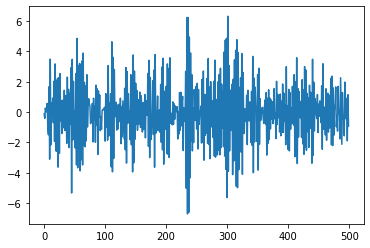

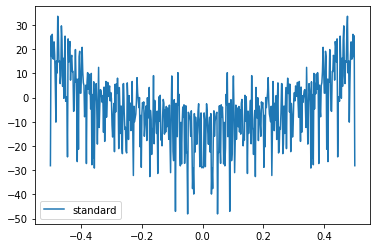

In [141]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.signal as sig


# Question 1.1
def AR_process(N,  AR_coeff_P, innov_sigma=1):
    P = len(AR_coeff_P)
    Z_N = innov_sigma * np.random.randn(N)
    X = np.zeros(N)
    X[0] = Z_N[0]
    for n in range(1, N):
        q = min(P,n)
        X[n] = Z_N[n] + (np.flip(AR_coeff_P[:q]) * X[n-q:n]).sum()
    return X

def ARMA(N, AR_coeff_P, MA_coeff_Q, innov_sigma_eps=1):
    P,Q = len(AR_coeff_P), len(MA_coeff,Q)
    epsilons = innov_sigma_eps * np.random.randn(N)
    X = np.zeros(N)
    X[0] = epsilons[0]
    for n in range(1,N):
        k1,k2 = min(P,n), min(Q,n)
        X[n] = epsilons[n] + (np.flip(AR_coeff_P[:k1]) * X[n-k1:n]).sum() + (np.flip(MA_coeff_Q[:k2]) * epsilons[n-k2:n]).sum()
    return X

X = AR_process(N=500, AR_coeff_P=[-0.9])
plt.figure()
plt.plot(np.arange(len(X)), X)
plt.show()


# Question 1.2.
def compute_periodogram(X_N, method="standard"):
    N = len(X_N)
    f = N 
    Nu_F = np.linspace(start=-0.5, stop=0.5, num=f)



    if method == "standard":
        # f, Pxx = sig.periodogram(X_N, fs=2.0)
        Exp_FN = np.exp(-2j* np.pi * Nu_F[:, None] * np.arange(0, N)[None])
        Sp_F = np.abs((X_N[None] * Exp_FN).sum(axis=-1)) ** 2
        Sp_F *=  N **(-1)
    elif method == "Welch":
        return 0
    elif method == "Bartlett":
        return 0
    return Nu_F, Sp_F
# test
sigma = 1
coeff = [-0.7]
X_N = AR_process(N=500, AR_coeff_P=coeff, innov_sigma=sigma)
f1, Pxx_std = compute_periodogram(X_N, method="Welch")

Pxx_tr = (sigma  / np.abs((1- coeff[0] * np.exp(-2*1j*np.pi * f1)))) ** 2
plt.figure()
plt.plot(f1, 20 * np.log10(Pxx_std), label="standard")

plt.legend()
plt.show()


In [107]:
def AR(coef, N, sigma2):
    
    """Computes an AR process with given coefficients and innovation variance sigma**2"""
    """The formula at any rank N is given by XN = N(0,sigma2) (this is Zt) + sum_i=1^N ai X_N-i"""
    """We assume coef starts at a1"""
    
    Lcoef = len(coef)
    X = [gauss(0,sigma2)]
    for i in range(N):
        tmp = gauss(0,sigma2)
        for k in range(0,min(i,Lcoef)):
            tmp += coef[k]*X[i-1-k]
        X.append(tmp)
    X.append(0)0
    return X #We will return the whole AR process and not just the XN value, as it may be useful. Also, to get specifically XN, we can just call X[-1], it's quick enough.

In [113]:
def AR1_(a1, N, sigma2):
    X = [gauss(0,sigma2)]
    for i in range(1,N+1):
        X.append(a1*X[i-1]+gauss(0,sigma2))
    return X

In [132]:
def create_AR(N, sigma2, coeffs):
    Z = np.random.normal(0,sigma2,size=N)
    X = [0 for k in range(N)]
    for k in range(N):
        s = 0
        for i in range(len(coeffs)):
            s+=coeffs[i]*X[k-i-1]
        X[k] = s+ Z[k]
    return X

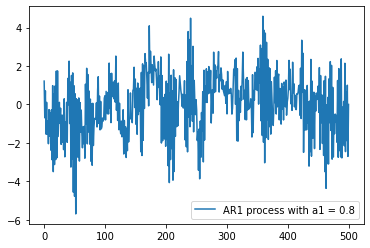

In [121]:
Nx=500
a1 = 0.7                                 #################HERE IS THE A1 COEFFICIENT IF A MODIFICATION IS NEEDED##############################"
AR1 = AR([a1],Nx,1)
AR1 = AR1 #/ np.amax(AR1)
absc = np.linspace(0,Nx,Nx+2)
plt.plot(absc, AR1, label='AR1 process with a1 = ' + '{0:.3g}'.format(a1))
plt.legend()
plt.show()

In [129]:
def periodogram(X,method='sta', window = 'rec'):
    
    N = Nx
    Sxx = np.linspace(-0.5,0.5,N)
    if(method == 'sta'):
        #For M. Fontaine : the Sxx = abs(np.fft.fft(X,N))**2/N doesn't work for some reason, I decided to give it up and make it at hand. 
        for i in range(N): #La valeur en Sxx[i]
            tmp = 0
            for j in range(1,N+1): #La convolution
                tmp += X[j] * np.exp(-2j*np.pi*Sxx[i]*j)
            Sxx[i] = np.abs(tmp)**2/N
        return Sxx/np.amax(Sxx) #We don't forget to normalize to avoid any problems
    
    if(method =='fou'):
        Sxx = abs(np.fft.fft(X,N))**2/N
        return Sxx/np.amax(Sxx)
    
    if(method == 'bar'):
        M=2**(np.floor(np.log(N)/np.log(2)-1))
        L=np.floor(2*N/M)-1
        M,L = int(M), int(L)
        for i in range(M*L-len(X)): #Zero-padding to match closest upwards power of two
            X.append(0)
        for i in range(L):
            Sxx += abs(np.fft.fft(X[i*M:(i+1)*M]))**2/(M*L)
        return Sxx
    
    if(method == 'wel'):
        M=int(2**(np.floor(np.log(N)/np.log(2)-1)))
        S=int(2*np.ceil(N/M))
        if window == 'rec':
            w = [1]*M
            #To Do (if we need to use windows later for Welch method)
        for i in range(M*S-len(X)): #Zero-padding to match closest upwards power of two
            X.append(0)
        K=M//2
        for i in range(S):
            P=0
            for k in range(M):
                P+=w[k]**2/N
            Sxx += abs(np.fft.fft(np.multiply(w,X[i*K:i*K+M])))**2/(M*P*S)
        return Sxx
    
    #There used to be a problem, it was the zero padding. I added until it matched N, but not len(X), which added 0 each time it was called, even unnecessary ones.
    #The problem is by computing len(X) at each call, we obviously have this problem anyways. My solution : give N from outside. 

In [130]:
def PSD_ar1(a1,sigma2,nu):
    return sigma2/abs(1-a1*np.exp(-2j*np.pi*nu))**2

C:\Users\GUILLA~1\AppData\Local\Temp/ipykernel_20080/4233458365.py:15: RuntimeWarning: overflow encountered in square
  Sxx = abs(np.fft.fft(X,N))**2/N
C:\Users\GUILLA~1\AppData\Local\Temp/ipykernel_20080/4233458365.py:16: RuntimeWarning: invalid value encountered in true_divide
  return Sxx/np.amax(Sxx)


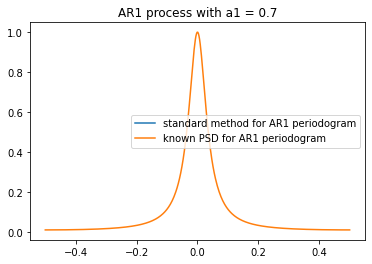

In [134]:
period_stand = periodogram(create_AR(500,1,[0,7]), method = 'fou')
absc = np.linspace(-0.5,0.5,Nx)
psdar1 = PSD_ar1(a1, 1, absc)
plt.plot(absc, period_stand, label = 'standard method for AR1 periodogram')
plt.plot(absc, psdar1/np.amax(psdar1), label = 'known PSD for AR1 periodogram') #We normalize everything
plt.title('AR1 process with a1 = 0.7') 
plt.legend()
plt.show() 

In [125]:
period_bart = periodogram(AR1,'bar')
absc = np.linspace(-0.5,0.5,len(period_bart))
plt.plot(absc, period_bart, label = 'bartlett method for AR1 periodogram')
plt.plot(absc, PSD_ar1(-0.7, 1, absc), label = 'known PSD for AR1 periodogram')
plt.legend()
plt.show()

ValueError: operands could not be broadcast together with shapes (500,) (128,) (500,) 

In [83]:
period_welc = periodogram(AR1,'wel')
absc = np.linspace(-0.5,0.5,len(period_welc))
plt.plot(absc, period_welc, label = 'welch method for AR1 periodogram')
plt.plot(absc, PSD_ar1(-0.7, 1, absc), label = 'known PSD for AR1 periodogram')
plt.legend()
plt.show()

ValueError: operands could not be broadcast together with shapes (500,) (128,) (500,) 

In [135]:
A=[0,1,2,3,4,5,6]
np.multiply(A[2:4],A[1:3])

array([2, 6])

In [28]:
B = [1,2,3]
B*2

[1, 2, 3, 1, 2, 3]